# Business Intelligence Lab
# Experiment 04

### Aim:
To perform exploratory data analysis and data visualization using python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [2]:
bengaluru=pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/Bengaluru_House_Data.csv')

In [3]:
bengaluru.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7328,Super built-up Area,Ready To Move,Ashwini layout,1 BHK,Kaantth,834,1.0,1.0,62.0
9278,Super built-up Area,Ready To Move,Hoodi Layout,2 BHK,SVstos,1160,2.0,2.0,75.0
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6640,NaN,NaN,375.0
6668,Built-up Area,Ready To Move,Whitefield,3 BHK,NaN,1550,2.0,2.0,49.6
9667,Built-up Area,18-Mar,Devanahalli,3 Bedroom,NaN,2125,3.0,1.0,107.0


### Information about Data

In [4]:
#Shape of the data
bengaluru.shape

(13320, 9)

In [5]:
#Data type of columns
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#Mathematical columns
bengaluru.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


### Data Preprocessing

In [7]:
df = bengaluru

In [8]:
#40% of the data is missing so droping the column
df.drop('society',axis=1,inplace=True)

In [9]:
df.location.replace(to_replace=np.NaN,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.NaN,value=df.area_type.mode()[0],inplace=True)

In [10]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)

In [11]:
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()

0    0
1    1
2    1
3    1
4    1
Name: availability, dtype: object

In [12]:
# Removing Outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170,2.0,1.0,38.00


# Exploratory Data Visualization
Exploratory Data Analysis (EDA) is the first step in your data analysis process developed by “John Tukey” in the 1970s. In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. By the name itself, we can get to know that it is a step in which we need to explore the data set.

When you are trying to build a machine learning model you need to be pretty sure whether your data is making sense or not. The main aim of exploratory data analysis is to obtain confidence in your data to an extent where you’re ready to engage a machine learning algorithm.



## Descriptive analysis - Central tendency
A measure of central tendency is a summary statistic that represents the center point or typical value of a dataset. These measures indicate where most values in a distribution fall and are also referred to as the central location of a distribution. We can think of it as the tendency of data to cluster around a middle value. 

In statistics, the three most common measures of central tendency are the mean, median, and mode. Each of these measures calculates the location of the central point using a different method. Choosing the best measure of central tendency depends on the type of data we have
1. **Mean (Average)**: Represents the sum of all values in a dataset divided by the total number of the values.
2. **Median**: The middle value in a dataset that is arranged in ascending order (from the smallest value to the largest value). If a dataset contains an even number of values, the median of the dataset is the mean of the two middle values.
3. **Mode**: Defines the most frequently occurring value in a dataset. In some cases, a dataset may contain multiple modes, while some datasets may not have any mode at all.

The selection of a central tendency measure depends on the properties of a dataset. For instance, the mode is the only central tendency measure for categorical data, while a median works best with ordinal data.

Although the mean is regarded as the best measure of central tendency for quantitative data, that is not always the case. For example, the mean may not work well with quantitative datasets that contain extremely large or extremely small values. The extreme values may distort the mean. Thus, you may consider other measures.

In [13]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


availability     0.779640
size             2.458488
bath             2.314184
balcony          1.555254
price           75.607965
dtype: float64

In [14]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


availability     1.0
size             2.0
bath             2.0
balcony          2.0
price           65.0
dtype: float64

In [15]:
df.mode().T

,0
area_type,Super built-up Area
availability,1
location,Whitefield
size,2.0
total_sqft,1200
bath,2.0
balcony,1.0
price,75.0


## Descriptive analysis - Dispersion and Distribution
A distribution tells you how likely certain events are, e.g For the normal distribution (continuous) you can talk about the probability that you get a number between 3 and 7, or for a discrete distribution like the Poisson, how likely are you to get 3?

A measure of dispersion tells you, if you see many events happen, how spread out are they going to be.

### Dispersion:
Most measures of dispersion have the same units as the quantity being measured. In other words, if the measurements are in meters or seconds, so is the measure of dispersion.There are two main types of dispersion methods in statistics which are:

1. **Absolute Measure of Dispersion**: <br>
An absolute measure of dispersion contains the same unit as the original data set. Absolute dispersion method expresses the variations in terms of the average of deviations of observations like standard or mean deviations. It includes range, standard deviation, quartile deviation, etc. The types of absolute measures of dispersion are range, variance, standard deviation, quartiles, and so on.

2. **Relative Measure of Dispersion**: <br>
The relative measures of dispersion are used to compare the distribution of two or more data sets. This measure compares values without units. Common relative dispersion methods include:
  - Coefficient of Range
  - Coefficient of Variation
  - Coefficient of Standard Deviation
  - Coefficient of Quartile Deviation
  - Coefficient of Mean Deviation

### Distribution: 
When we use the term normal distribution in statistics, we usually mean a probability distribution. Good examples are the Normal distribution, the Binomial distribution, and the Uniform distribution.
A distribution in statistics is a function that shows the possible values for a variable and how often they occur.

Types of Distributions:
1. Bernoulli Distribution
2. Uniform Distribution
3. Normal Distribution
4. Poisson Distribution
5. Exponential Distribution


In [16]:
Q1 = df.quantile(0.25)
print("First quartile:\n",Q1)
Q3 = df.quantile(0.75)
print("\nThird quartile:\n",Q3)
IQR = Q3 - Q1
print("\nInter Quartile Range:\n",IQR)


First quartile:
 size        2.0
bath        2.0
balcony     1.0
price      46.8
Name: 0.25, dtype: float64

Third quartile:
 size        3.0
bath        3.0
balcony     2.0
price      93.0
Name: 0.75, dtype: float64

Inter Quartile Range:
 size        1.0
bath        1.0
balcony     1.0
price      46.2
dtype: float64


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size,11322.0,2.458488,0.693133,1.0,2.0,2.0,3.0,4.0
bath,11280.0,2.314184,0.686819,1.0,2.0,2.0,3.0,4.0
balcony,11049.0,1.555254,0.787329,0.0,1.0,2.0,2.0,3.0
price,11336.0,75.607965,40.749656,8.0,46.8,65.0,93.0,225.0


In [18]:
#Standard deviation
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


availability     0.414508
size             0.693133
bath             0.686819
balcony          0.787329
price           40.749656
dtype: float64

## Correlation 
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.

Correlation, statistical technique which determines how one variable moves/changes in relation with the other variable. It gives us the idea about the degree of the relationship of the two variables. It’s a bi-variate analysis measure which describes the association between different variables. In most of the business it’s useful to express one subject in terms of its relationship with others

### Types of Correlation:

<u>Based on the degree of correlation:</u>

1. Positive Correlation: <br>
Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases.

2. Negative Correlation: <br>
Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) decreases.

3. No Correlation: <br>
Two features (variables) are not correlated with each other. It means that when the value of one variable increases or decreases then the value of the other variable(s) doesn’t increase or decrease.

<u> Based on the change in proportion:</u>
1. Linear: <br>
If the value of the amount of change in one variable tends to preserve a constant ratio to the amount of change in other variables, then the correlation is said to be linear. For Example, Whenever the price rises by 10%, then supply rises by 20%.

2. Non-linear: <br>
If the value of the amount of change in one variable does not preserve a constant ratio to the amount of change in the other variables, then it is said to be a Non-linear correlation. It is also known as the Curvilinear correlation. For Example, Whenever price rises by 10%, but supply rises sometimes by 20%, sometimes by 10%, and sometimes by 40%.

## Correlation vs Causation 

**Correlation**: 
It is a numerical measure of the direction and magnitude of the mutual relationship between the variables(X and Y).

**Causation**: 
X is the cause of change in Y i.e, the change of Y is the effect of change in X.

NOTE: <br>
-  If X and Y are correlated then X and Y may or may not have a casual relationship.
-  If X and Y have a causal relationship then X and Y must be correlated.



In [19]:
df.corr()

,size,bath,balcony,price
size,1.000000,0.800334,0.276193,0.562561
bath,0.800334,1.000000,0.291793,0.607615
balcony,0.276193,0.291793,1.000000,0.171645
price,0.562561,0.607615,0.171645,1.000000


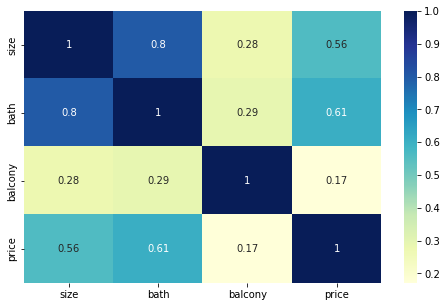

In [20]:
#Displaying a heatmap for this correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

# Data Visualization
Data visualization is defined as a graphical representation that contains the information and the data. By using visual elements like charts, graphs, and maps, data visualization techniques provide an accessible way to see and understand trends, outliers, and patterns in data.

In modern days we have a lot of data in our hands i.e, in the world of Big Data, data visualization tools, and technologies are crucial to analyze massive amounts of information and make data-driven decisions. It is used in many areas such as:
- To model complex events.
- Visualize phenomenons that cannot be observed directly, such as weather patterns, medical conditions, or mathematical relationships.

## Univariate Analysis Techniques for Data Visualization
1. **Distribution Plot** <br>
It is one of the best univariate plots to know about the distribution of data.
When we want to analyze the impact on the target variable(output) with respect to an independent variable(input), we use distribution plots a lot. <br>
This plot gives us a combination of both probability density functions(pdf) and histogram in a single plot.

2. **Box and Whisker Plot** <br>
This plot can be used to obtain more statistical details about the data.
The straight lines at the maximum and minimum are also called whiskers.
Points that lie outside the whiskers will be considered as an outlier.
The box plot also gives us a description of the 25th, 50th,75th quartiles.<br>
With the help of a box plot, we can also determine the Interquartile range(IQR) where maximum details of the data will be present. Therefore, it can also give us a clear idea about the outliers in the dataset.

3. **Violin Plot** <br>
The violin plots can be considered as a combination of Box plot at the middle and distribution plots(Kernel Density Estimation) on both sides of the data. <br>
This can give us the description of the distribution of the dataset like whether the distribution is multimodal, Skewness, etc.
It also gives us useful information like a 95% confidence interval.

4. **Density Plots** <br>
Another quick and easy technique for getting each attribute's distribution is Density plots. It is also like a histogram but having a smooth curve drawn through the top of each bin. We can call them as abstracted histograms.


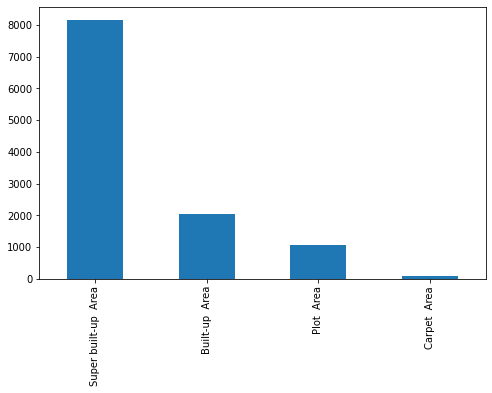

In [21]:
df.area_type.value_counts().plot(kind='bar', figsize=(8,5))

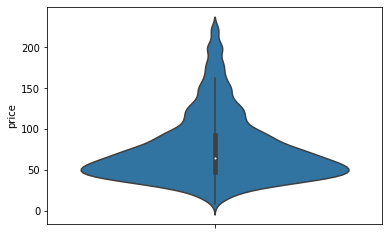

In [22]:
sns.violinplot(y = df.price)

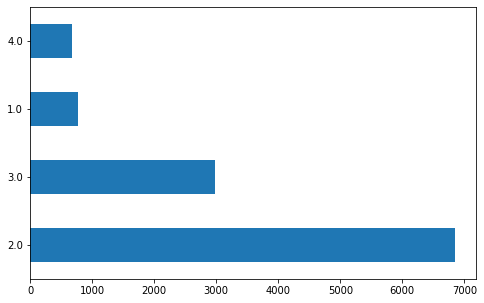

In [23]:
df.bath.value_counts().plot(kind='barh', figsize=(8,5))

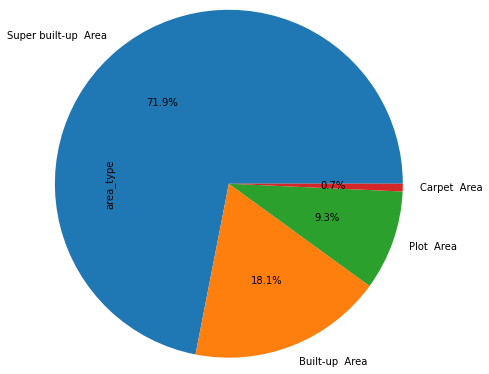

In [24]:
(df["area_type"].value_counts()).plot.pie(autopct="%.1f%%", wedgeprops={'linewidth': 6}, radius=2)
plt.show()

## Bivariate Analysis Techniques for Data Visualization

1. **Line Plot** <br>
This is the plot that you can see in the nook and corners of any sort of analysis between 2 variables.
The line plots are nothing but the values on a series of data points will be connected with straight lines.
The plot may seem very simple but it has more applications not only in machine learning but in many other areas.

2. **Bar Plot** <br>
This is one of the widely used plots, that we would have seen multiple times not just in data analysis, but we use this plot also wherever there is a trend analysis in many fields.
Though it may seem simple it is powerful in analyzing data like sales figures every week, revenue from a product, Number of visitors to a site on each day of a week, etc.

3. **Scatter Plot** <br>
It is one of the most commonly used plots used for visualizing simple data in Machine learning and Data Science.
This plot describes us as a representation, where each point in the entire dataset is present with respect to any 2 to 3 features(Columns).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

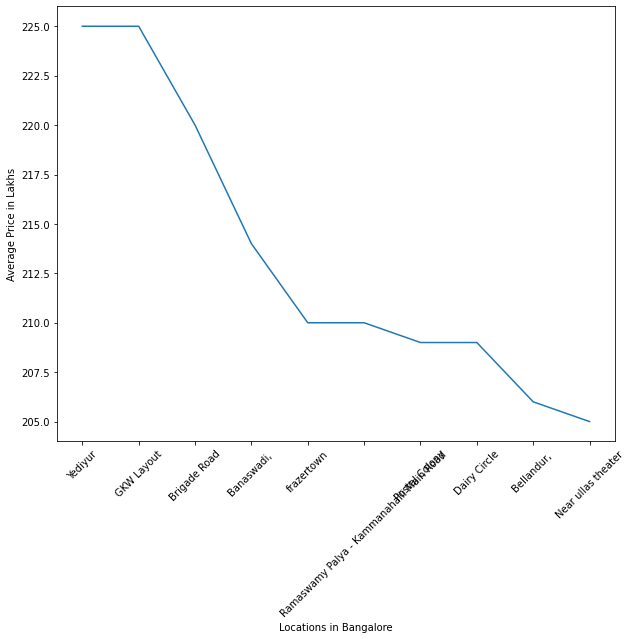

In [25]:
plt.figure(figsize=(10,8))
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations in Bangalore')
plt.ylabel('Average Price in Lakhs')
plt.xticks(rotation=45)

Text(0.5, 0, 'Number of Bedrooms')

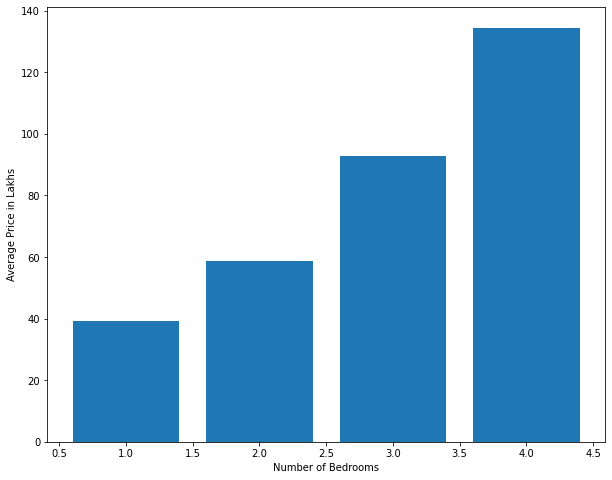

In [26]:
df10 = df.copy()
df10['size'] = np.round(df10['size'])
plt.figure(figsize=(10,8))
plt.bar(x=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Average Price in Lakhs')
plt.xlabel('Number of Bedrooms')